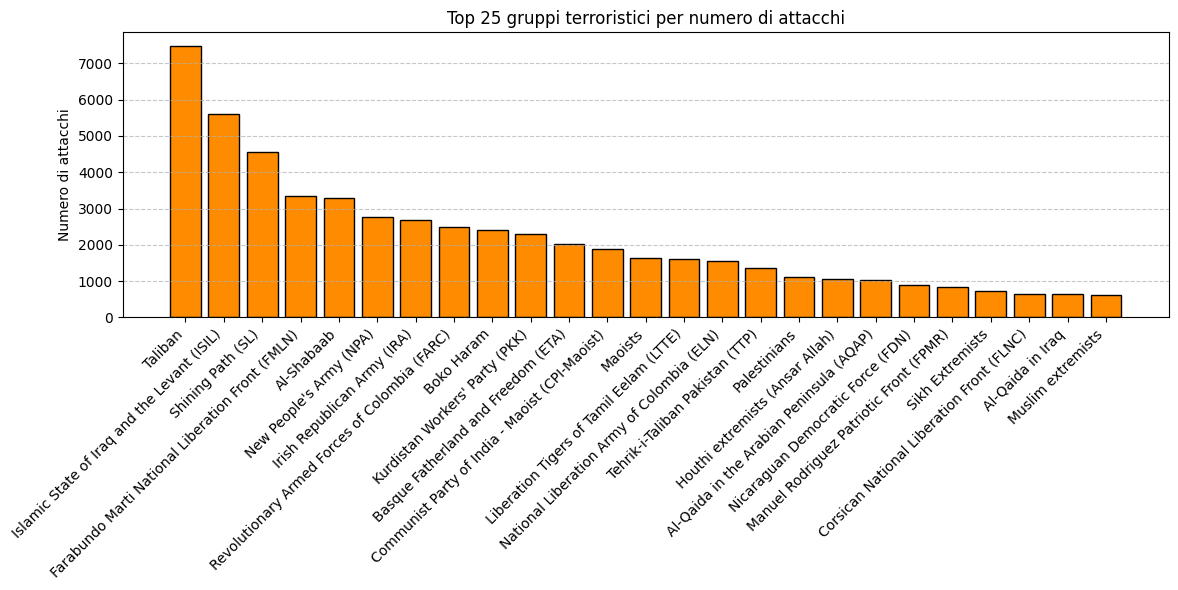

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path


# 1. Percorso del file CSV
data_path = Path('../../data/globalterrorismdb.csv')

# 2. Carica il dataset
df = pd.read_csv(data_path, encoding='latin1', low_memory=False)


# 3. Calcola i top 25 gruppi terroristici
# Conta gli attacchi per gruppo e rimuove 'Unknown'

top_groups = df['gname'].value_counts().drop('Unknown').head(25)

plt.figure(figsize=(12, 6))
plt.bar(top_groups.index, top_groups.values, 
        color='darkorange', edgecolor='black')

plt.title('Top 25 gruppi terroristici per numero di attacchi')
plt.ylabel('Numero di attacchi')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

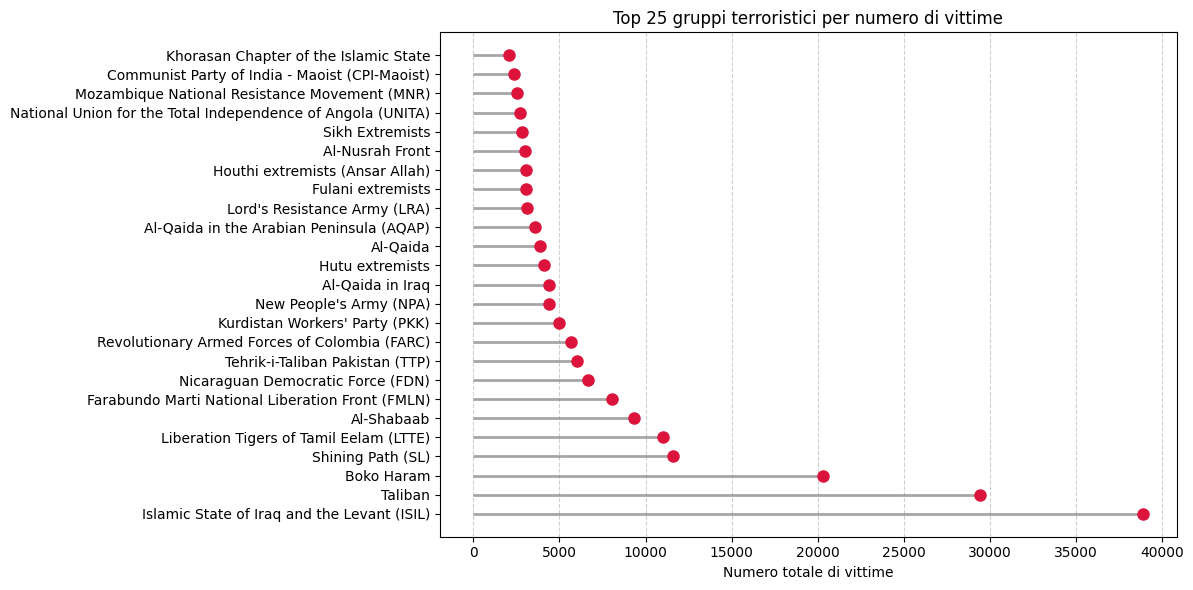

In [6]:
# Dati
df_groups = df[df['gname'] != 'Unknown']
group_stats = df_groups.groupby('gname').agg({
    'nkill': 'sum'
}).rename(columns={'nkill': 'total_victims'}).sort_values('total_victims', ascending=False).head(25)

# Plot
plt.figure(figsize=(12,6))
plt.hlines(y=group_stats.index, xmin=0, xmax=group_stats['total_victims'], color='gray', alpha=0.7, linewidth=2)
plt.plot(group_stats['total_victims'], group_stats.index, "o", markersize=8, color='crimson')

plt.xlabel('Numero totale di vittime')
plt.title('Top 25 gruppi terroristici per numero di vittime')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()